In [95]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [116]:
df = pd.read_csv("/content/winequality-red.csv")

In [97]:
print("Dataset Shape: ", df.shape)

Dataset Shape:  (1599, 12)


In [98]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [100]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [101]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [112]:
# quite a lot of duplicates in the dataset.
n_duplicated_entries = df.duplicated().sum()
print("Number of duplicated entries: ", n_duplicated_entries)
print(
    f"Percentage of duplicated columns:  {(n_duplicated_entries / len(df))*100:.2f}%"
)

Number of duplicated entries:  240
Percentage of duplicated columns:  15.01%


In [117]:
print("Unique Classes in target variable 'quality':", df.quality.unique())
df.quality.value_counts()  # converting these classes to binary classes

Unique Classes in target variable 'quality': [5 6 7 4 8 3]


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [118]:
# wine with quality value >= 6.5 are considered good wines, they are assigned with label 1.
# others are bad wines per se and assigned label 0.
df["quality"] = df["quality"].apply(lambda quality: 1 if quality >= 6.5 else 0)

Text(0.5, 1.0, 'Target Distribution - quality')

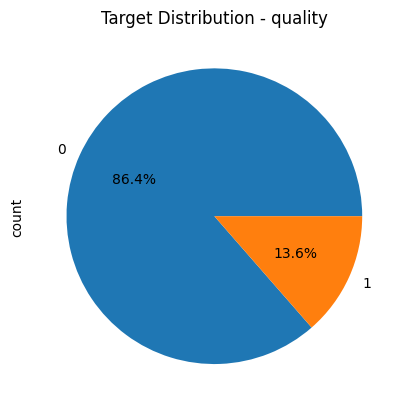

In [119]:
df.quality.value_counts().plot.pie(autopct="%1.1f%%")
df.quality.value_counts()
plt.title("Target Distribution - quality")
# unbalanced data. need to use under/over sampling.
# does tell us good wine is hard to get

<Axes: >

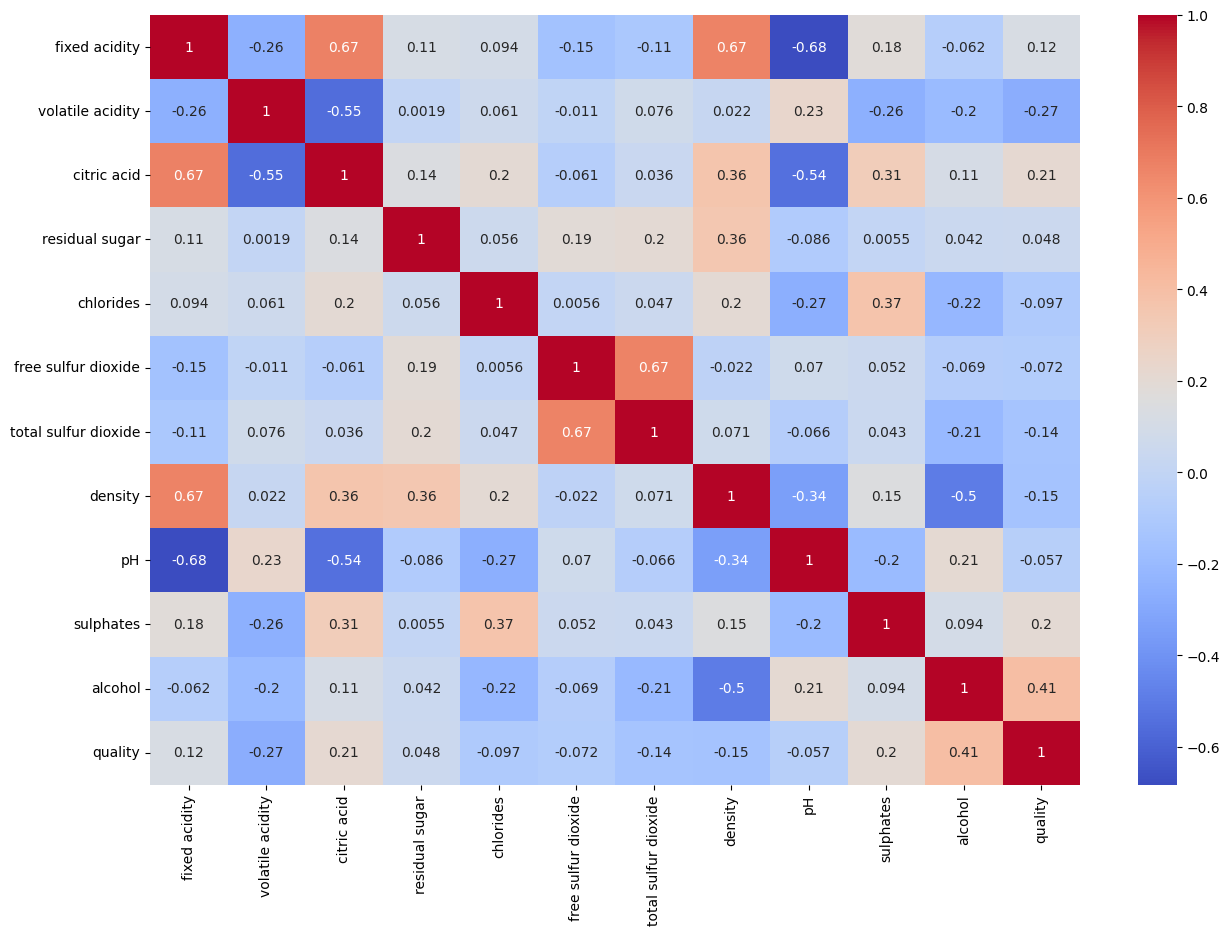

In [121]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)

In [122]:
# dropping "pH" and "residual sugar" columns as they don't affect the target very much.
df.drop(columns=["pH", "residual sugar"], inplace=True)

In [123]:
X = df.drop(columns="quality")  # features
y = df["quality"]  # target variable

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
# scaling the features
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [126]:
# building the model
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42, criterion="entropy")

In [127]:
# fitting the data on to the model
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [128]:
# making predictions from our model
y_preds = random_forest_classifier.predict(X_test)

In [129]:
random_forest_acc = accuracy_score(y_test, y_preds)
random_forest_acc

0.90625

In [130]:
#building the model
logistic_regression_classifier = LogisticRegression(random_state=42)
logistic_regression_classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [133]:
y_preds = logistic_regression_classifier.predict(X_test)
logistic_regression_acc = accuracy_score(y_test, y_preds)
logistic_regression_acc

0.85625

[Text(0, 0, '0.85625'), Text(0, 0, '0.90625')]

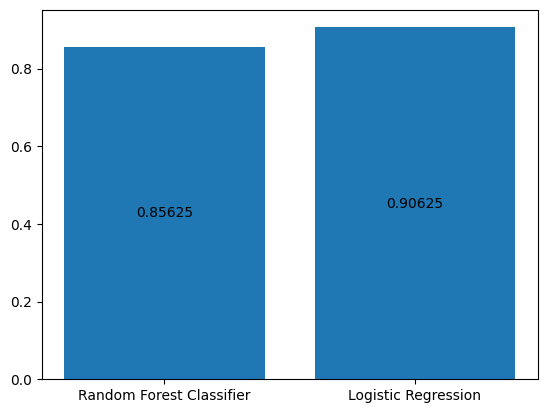

In [134]:
models = ["Random Forest Classifier", "Logistic Regression"]
figure = plt.bar(models, [logistic_regression_acc, random_forest_acc])
plt.bar_label(figure, label_type="center")